# Project 6: SAT Scores
## Data Cleaning Project

In this project, we will use more advanced data cleaning analysis methods to perform data visualization using SAT Results from multiple datasets and compare various demographic factors such as race, gender and more.

Datasets used in this project from:
* [SAT Results](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) 

We will first import datasets as usual, and directly clean and exctract useful informations:

In [76]:
import pandas as pd
import numpy as np
ap= pd.read_csv("ap_2010.csv",na_values='s')
demo= pd.read_csv("demographics.csv")
loc= pd.read_csv("hs_directory.csv")
sat= pd.read_csv("sat_results.csv",na_values='s')
ap.info()
demo.info()
loc.info()
sat.info()

In [77]:
ap=ap[['DBN','AP Test Takers ']].fillna(0)
ap.head()

,DBN,AP Test Takers
0,01M448,39.0
1,01M450,19.0
2,01M515,24.0
3,01M539,255.0
4,02M296,0.0


In [78]:
demo=demo.loc[demo["schoolyear"] == 20112012,['DBN','total_enrollment','asian_per','black_per','hispanic_per','white_per','female_per']]
demo.head()

,DBN,total_enrollment,asian_per,black_per,hispanic_per,white_per,female_per
6,01M015,189,6.3,33.3,57.7,2.1,48.7
13,01M019,328,15.5,24.7,48.2,8.5,55.2
20,01M020,626,30.4,8.8,57.0,2.6,47.3
27,01M034,401,5.5,22.4,68.6,2.0,49.1
35,01M063,176,5.1,23.3,62.5,8.5,44.9


In [79]:
loc['lat']=loc['Location 1'].apply(lambda x: float(x.split('(')[-1].split(',')[0]))
loc['lon']=loc['Location 1'].apply(lambda x: float(x.split('(')[-1].split(',')[1].strip(')')))
loc.rename(columns={'dbn' : 'DBN'},inplace=True)
loc=loc[['DBN','lat','lon']]
loc.head()

,DBN,lat,lon
0,17K548,40.670299,-73.961648
1,09X543,40.827603,-73.904475
2,09X327,40.842414,-73.916162
3,02M280,40.710679,-74.000807
4,28Q680,40.718810,-73.806500


In [80]:
sat['sat_score']=sat[['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score','SAT Writing Avg. Score']].mean(axis=1)
sat=sat[['DBN','sat_score']].dropna()
sat.head()

,DBN,sat_score
0,01M292,374.000000
1,01M448,390.666667
2,01M450,383.000000
3,01M458,391.333333
4,01M509,402.333333


We will finally merge all datasets into one to visualize correlation of scores on different attributes and demographics:

In [82]:
df=sat.merge(ap, how='left').merge(demo).merge(loc).fillna(0)
df['AP_per']=(df['AP Test Takers ']/df['total_enrollment'])*100
df.head()

,DBN,sat_score,AP Test Takers,total_enrollment,asian_per,black_per,hispanic_per,white_per,female_per,lat,lon,AP_per
0,01M292,374.000000,0.0,422,14.0,29.1,53.8,1.7,38.6,40.713764,-73.985260,0.000000
1,01M448,390.666667,39.0,394,29.2,22.6,45.9,2.3,42.6,40.712332,-73.984797,9.898477
2,01M450,383.000000,19.0,598,9.7,23.9,55.4,10.4,45.3,40.729783,-73.983041,3.177258
3,01M509,402.333333,0.0,367,9.3,31.6,56.9,1.6,53.7,40.720569,-73.985673,0.000000
4,01M539,540.333333,255.0,1613,27.8,11.7,14.2,44.9,50.8,40.718725,-73.979426,15.809051


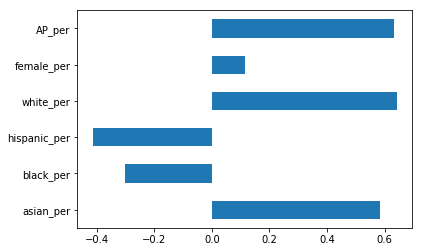

In [93]:
df.corr()["sat_score"][['asian_per','black_per','hispanic_per','white_per','female_per','AP_per']].plot.barh()

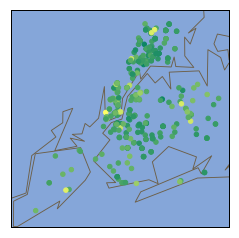

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.9)
m.drawrivers(color='#6D5F47', linewidth=.9)

longitudes = df['lon'].tolist()
latitudes = df['lat'].tolist()
m.scatter(longitudes, latitudes,s=20 , zorder=2, latlon=True, c=df['sat_score'],cmap="summer")
plt.show()

End. Thankyou!